                                                                      PRACTICAL  06 I: Naive Bayes

NAME : KETAN POLAWAR

ROLL NO :40

AIM :-
Create a machine learning model to predict whether a person survived in Titanic or not.

1 Perform the EDA

2 Apply Naive Bayes classifier 

3 Apply SVM

4 Apply RF

5 Evaluate the performance using Precision, Recall, F1 score and accuracy.

6 Apply hyper parameter tuning to improve performance.


In [5]:
import os
os.getcwd()

'c:\\Users\\DHANSHRI\\OneDrive\\Desktop\\Acedemics\\fourth\\vs backup'

In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("tan.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.drop(['Name','SibSp','Parch','Embarked'], axis=1,inplace=True)

In [10]:
df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN
1,2,1,1,female,38.0,PC 17599,71.2833,C85
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,female,35.0,113803,53.1000,C123
4,5,0,3,male,35.0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,211536,13.0000,NaN
887,888,1,1,female,19.0,112053,30.0000,B42
888,889,0,3,female,NaN,W./C. 6607,23.4500,NaN
889,890,1,1,male,26.0,111369,30.0000,C148


In [11]:
df.drop(['Ticket','Cabin'], axis=1,inplace=True)

In [12]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000
887,888,1,1,female,19.0,30.0000
888,889,0,3,female,NaN,23.4500
889,890,1,1,male,26.0,30.0000


In [13]:
df.isnull()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,False,False,True,False
889,False,False,False,False,False,False


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64

In [15]:
mean = df["Age"].mean()

In [16]:
df["Age"].fillna(mean, inplace = True)

In [17]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.000000,7.2500
1,2,1,1,female,38.000000,71.2833
2,3,1,3,female,26.000000,7.9250
3,4,1,1,female,35.000000,53.1000
4,5,0,3,male,35.000000,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000
887,888,1,1,female,19.000000,30.0000
888,889,0,3,female,29.699118,23.4500
889,890,1,1,male,26.000000,30.0000


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [19]:
df['PassengerId'].duplicated().sum()

0

In [20]:
df.drop(['Fare'], axis=1,inplace=True)

In [21]:
#df.loc[df["Sex"]=="female"]=0
#df.loc[df["Sex"]=="male"]=1

In [22]:
df

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.000000
1,2,1,1,female,38.000000
2,3,1,3,female,26.000000
3,4,1,1,female,35.000000
4,5,0,3,male,35.000000
...,...,...,...,...,...
886,887,0,2,male,27.000000
887,888,1,1,female,19.000000
888,889,0,3,female,29.699118
889,890,1,1,male,26.000000


In [23]:
df['Sex'].replace({'male':0,'female':'1'},inplace=True)

In [24]:
df

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,0,22.000000
1,2,1,1,1,38.000000
2,3,1,3,1,26.000000
3,4,1,1,1,35.000000
4,5,0,3,0,35.000000
...,...,...,...,...,...
886,887,0,2,0,27.000000
887,888,1,1,1,19.000000
888,889,0,3,1,29.699118
889,890,1,1,0,26.000000


In [25]:
target = df.Survived

In [26]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
data = df.drop('Survived',axis=1)

In [28]:
data

,PassengerId,Pclass,Sex,Age
0,1,3,0,22.000000
1,2,1,1,38.000000
2,3,3,1,26.000000
3,4,1,1,35.000000
4,5,3,0,35.000000
...,...,...,...,...
886,887,2,0,27.000000
887,888,1,1,19.000000
888,889,3,1,29.699118
889,890,1,0,26.000000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [30]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

In [31]:
x_train,x_test,y_train,y_test

(     PassengerId  Pclass Sex        Age
 95            96       3   0  29.699118
 67            68       3   0  19.000000
 549          550       2   0   8.000000
 889          890       1   0  26.000000
 500          501       3   0  17.000000
 ..           ...     ...  ..        ...
 48            49       3   0  29.699118
 259          260       2   1  50.000000
 9             10       2   1  14.000000
 270          271       1   0  29.699118
 662          663       1   0  47.000000
 
 [712 rows x 4 columns],
      PassengerId  Pclass Sex        Age
 748          749       1   0  19.000000
 837          838       3   0  29.699118
 148          149       2   0  36.500000
 720          721       2   1   6.000000
 496          497       1   1  54.000000
 ..           ...     ...  ..        ...
 539          540       1   1  22.000000
 799          800       3   1  30.000000
 151          152       1   1  22.000000
 63            64       3   0   4.000000
 461          462       3   0 

In [32]:
len(x_train)

712

In [33]:
from sklearn import tree

In [34]:
model = tree.DecisionTreeClassifier()

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
model.score(x_test,y_test)

0.7430167597765364

In [37]:
model.predict([[1,2,38.0,71.2833]])

c:\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [38]:
model.predict([[1,2,38.0,15.2833]])

c:\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(x_train,y_train)


GaussianNB()

In [40]:
y_prediction=model1.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_prediction,labels=model.classes_)


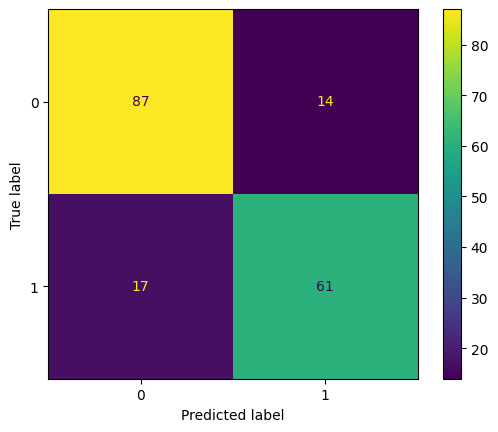

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       101
           1       0.81      0.78      0.80        78

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

